In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Kích thước dữ liệu:", iris_X.shape)
print("Số lượng lớp:", len(np.unique(iris_y)))
print("Feature names:", feature_names)
print("Target names:", target_names)

iris_df = pd.DataFrame(iris_X, columns=feature_names)
iris_df["target"] = iris_y
iris_df["species"] = [target_names[i] for i in iris_y]
iris_df

Kích thước dữ liệu: (150, 4)
Số lượng lớp: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


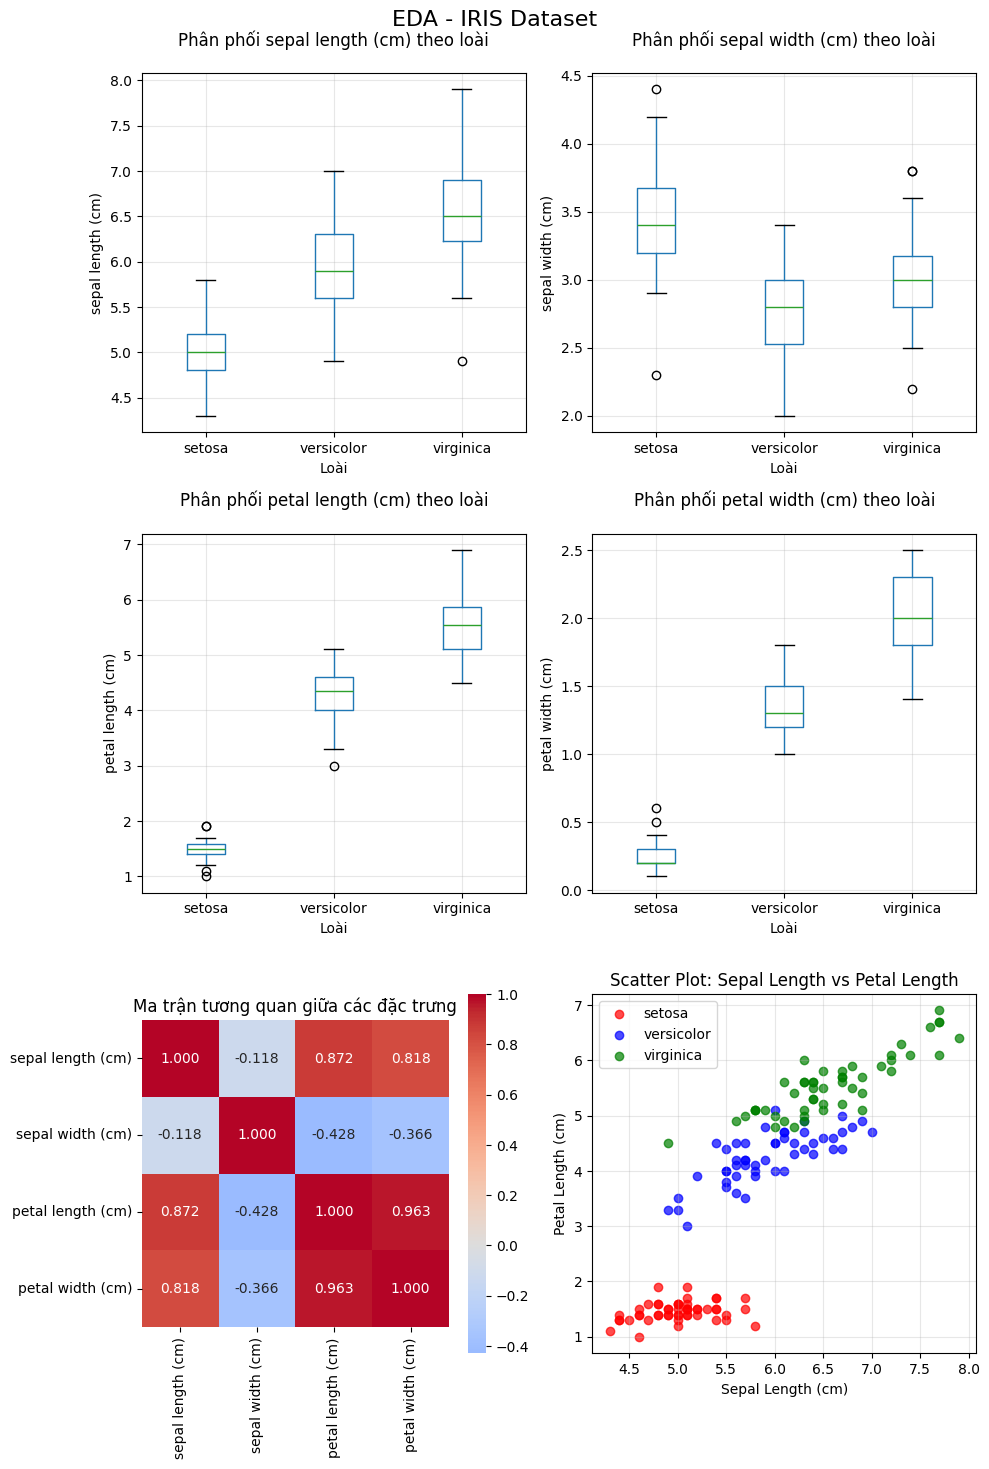

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

for i, feature in enumerate(feature_names):
    ax = axes[i // 2, i % 2]
    iris_df.boxplot(column=feature, by="species", ax=ax)
    ax.set_title(f"Phân phối {feature} theo loài", fontsize=12, pad=20)
    ax.set_xlabel("Loài", fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.grid(True, alpha=0.3)
    
axes[2, 0].remove()
axes[2, 0] = plt.subplot(3, 2, 5)
correlation_matrix = iris_df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,
square=True, ax=axes[2, 0], fmt=".3f")
axes[2, 0].set_title("Ma trận tương quan giữa các đặc trưng", fontsize=12)

axes[2, 1].remove()
axes[2, 1] = plt.subplot(3, 2, 6)
colors = ["red", "blue", "green"]
for i, species in enumerate(target_names):
    species_data = iris_df[iris_df["species"] == species]
    axes[2, 1].scatter(species_data["sepal length (cm)"],
                    species_data["petal length (cm)"],
                    label=species, alpha=0.7, color=colors[i])
axes[2, 1].set_xlabel("Sepal Length (cm)", fontsize=10)
axes[2, 1].set_ylabel("Petal Length (cm)", fontsize=10)
axes[2, 1].set_title("Scatter Plot: Sepal Length vs Petal Length", fontsize=12)
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.suptitle("EDA - IRIS Dataset", fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig("01_EDA_IRIS.png", dpi=150, bbox_inches="tight")
plt.show()

In [5]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=42, stratify=iris_y)

print(f"Kích thước tập huấn luyện: {X_train_iris.shape}")
print(f"Kích thước tập kiểm tra: {X_test_iris.shape}")
print(f"Phân phối lớp trong tập huấn luyện: {np.bincount(y_train_iris)}")
print(f"Phân phối lớp trong tập kiểm tra: {np.bincount(y_test_iris)}")

Kích thước tập huấn luyện: (120, 4)
Kích thước tập kiểm tra: (30, 4)
Phân phối lớp trong tập huấn luyện: [40 40 40]
Phân phối lớp trong tập kiểm tra: [10 10 10]


In [6]:
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

In [8]:
# Xây dựng mô hình Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_iris, y_train_iris)

# Dự đoán
y_pred_iris = dt_classifier.predict(X_test_iris)

# Đánh giá
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))
accuracy = accuracy_score(y_test_iris, y_pred_iris)
print(f"Độ chính xác: {accuracy:.4f}") # 96\%

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Độ chính xác: 0.9333
